## Business Objective

* Dữ liệu được lấy trên một trong những trang web về thương mại điện tử lớn nhất Việt Nam.

* Trên trang này đã triển khai nhiều tiện ích hỗ trợ nâng cao trải nghiệm người dùng và họ muốn xây dựng nhiều tiện ích hơn nữa.


# Triển khai dự án

## Bước 1: Business Understanding

### Dựa vào yêu cầu nói trên => xác định vấn đề:

- Chưa có hệ thống Recommendation System 
- => Mục tiêu/ vấn đề: Xây dựng Recommendation System cho một hoặc một số nhóm hàng hóa giúp đề xuất và gợi ý cho người dùng/ khách hàng. => Xây dựng các mô hình đề xuất:

        ▪ Content-based filtering
        ▪ Collaborative filtering

## Bước 2: Data Understanding/ Acquire

### Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu cần thiết

Dữ liệu được cung cấp sẵn gồm có các tập tin: ProductRaw.csv, ReviewRaw.csv chứa thông tin sản phẩm, review và rating cho các sản phẩm thuộc các nhóm hàng hóa như Mobile_Tablet, TV_Audio, Laptop, Camera, Accessory.

## Bước 3: Data preparation/ Prepare

## Bước 4&5: Modeling & Evaluation/ Analyze & Report

#### Tập trung giải quyết hai bài toán

* Bài toán 1: Đề xuất người dùng với Content based filtering 

* Bài toán 2: Đề xuất người dùng với Collaborative filtering

## Bước 6: Deployment & Feedback/ Act

#### Triển khai Recommender System lên website thương mại điện tử và theo dõi kết quả


# Data Preprocessing


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import emoji

In [2]:
STOP_WORD_FILE = 'vietnamese-stopwords.txt'

In [3]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

## Product data

In [4]:
# Load data
products = pd.read_csv('ProductRaw.csv')
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [5]:
products.shape

(4404, 10)

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4404 non-null   int64  
 1   name         4404 non-null   object 
 2   description  4401 non-null   object 
 3   rating       4404 non-null   float64
 4   price        4404 non-null   int64  
 5   list_price   4404 non-null   int64  
 6   brand        4404 non-null   object 
 7   group        4404 non-null   object 
 8   url          4404 non-null   object 
 9   image        4404 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 344.2+ KB


In [7]:
# Check NaN values
products.isna().sum()

item_id        0
name           0
description    3
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [8]:
# Loại bỏ giá trị thiếu
products = products.dropna()

In [9]:
products.isna().sum()

item_id        0
name           0
description    0
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [10]:
# check duplicate
products.duplicated().sum()

31

In [11]:
# loại bỏ dữ liệu trùng
products = products.drop_duplicates()

In [12]:
products.shape

(4370, 10)

In [13]:
# Before cleaning
products.iloc[0]['description']

'THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời gian pin - Thời gian nghe nhạc liên tục từ 2.5-4h - Thời gian sạc đầy chỉ khoảng 60p - Thời gian chờ lên tới 140 giờ\nBluetooth 5\nThương hiệu OEM\nXuất xứ thương hiệu Trung Quốc\nĐộ nhạy cảm biến vân tay\nModel i12\nLoại Jack cắm USB Cable\nTrọng lượng 300g\nThời gian sử dụng\n- Thời gian nghe nhạc liên tục từ 2.5-4h\nSKU 4096608751631\nMÔ TẢ SẢN PHẨM\nINPOD 12 là phiên bản nâng cấp mới nhất , tai nghe Bluetooth 5.0 có thiết kế tỉ lệ chuẩn 1:1 với tai Airpod chính hãng\nLược bỏ nút bấm trên thân tai thay vào đó là nút cảm ứng sử dụng dễ dàng và thuận tiện hơn\nThao tác nhận cuộc gọi đến, chuyển nhạc...một cách dễ dàng chỉ bằng 1 chạm\nBluetooth 5.0 mới nhất cho kết nối vô cùng ổn định\n- Bluetooth 5.0 mới nhất cho kết nối vô cùng ổn định\n- 2 tai nghe tự kết nối với nhau khi được lấy ra từ dock sạc\n- Chất âm và thời lượng pin được cải thiện tối ưu\n- Dock sạc tiện lợi cho tới 4 lần sạc đầy pin tai nghe\n-Các thiết bị tương thích: các thiế

In [14]:
# Before cleaning
products.iloc[30]['description']

'THÔNG TIN CHI TIẾT\nBluetooth 5\nThương hiệu OEM\nXuất xứ thương hiệu Trung Quốc\nKích thước\n56mm*44mm*21mm\nModel Inpod i12\nXuất xứ Trung Quốc\nThời gian sử dụng\nKhoảng 1.5 tiếng (tùy theo âm lượng nghe)\nSKU 3869352370595\nMÔ TẢ SẢN PHẨM\nTHÔNG SỐ KỸ THUẬT\nTên sản phẩm: Tai nghe Inpod i12 TWS Bluetooth 5.0 cho iPhone và Android kèm Hộp sạc\nModel: i12 TWS- Kết nối: Bluetooth 5.0\nHỗ trợ: HSP/HFP/A2DP/AVRCP/SPP\nNút chạm cảm ứng\nDải tần: 40Hz – 20KHz\nKhoảng cách kết nối: ≥10m\nKích thước: 56mm*44mm*21mm\nKhối lượng: 45g\nhời gian hoạt động: khoảng 1.5 tiếng (tùy theo âm lượng nghe)\nĐộ nhạy: 106dB SPL ± 3dB\nTai nghe Inpod i12 TWS Bluetooth 5.0 cho iPhone và Android kèm Hộp sạc\nVới thiết kế sang trọng, tinh tế Tai nghe Bluetooth 5.0 i12 TWS Bluetooth sẽ mang đến vẻ năng động, hiện đại cho bạn. Với trang bị cảm biến một chạm nâng cấp mới, mọi thao tác điều khiển chiếc tai nghe tiện lợi.\nChất âm được tuyệt vời khi cho bass, treble, mid cân bằng, mang tới những trải nghiệm nghe 

In [15]:
# Define a function to clean the text, combining all steps together
def simple_text_clean(dataframe):
    # Loại bỏ một số từ lặp lại nhiều lần
    words = ['THÔNG TIN CHI TIẾT', 'Thương hiệu', 'thương hiệu','Xuất xứ', 'Kích thước', 'MÔ TẢ SẢN PHẨM', 
             'Giá sản phẩm trên Tiki đã bao gồm thuế theo luật hiện hành. Tuy nhiên tuỳ vào từng loại sản phẩm hoặc phương thức, địa chỉ giao hàng mà có thể phát sinh thêm chi phí khác như phí vận chuyển, phụ phí hàng cồng kềnh, ...']
    for word in words:
        dataframe = dataframe.replace(word, '', regex=True)
    # Remove HTTP links
    dataframe = dataframe.replace(
        r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '',
        regex=True)
    # Remove end of line characters
    dataframe = dataframe.replace(r'[\r\n]+', ' ', regex=True)
    dataframe = dataframe.replace('[\w]*\d+[\w]*', '', regex=True)
    # Remove punctuation
    dataframe = dataframe.replace('[^\w\s]', ' ', regex=True)
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for char in punctuation:
        dataframe = dataframe.replace(char, ' ')
    # Remove multiple spaces with one space
    dataframe = dataframe.replace('[\s]{2,}', ' ', regex=True)
    # Some lines start with a space, remove them
    dataframe = dataframe.replace('^[\s]{1,}', '', regex=True)
    # Some lines end with a space, remove them
    dataframe = dataframe.replace('[\s]{1,}$', '', regex=True)
    # Convert to lower case
    dataframe = dataframe.str.lower()
    # Remove rows that are empty
    dataframe = dataframe[dataframe.str.len() > 0]
    # Remove stop words
    def remove_stopwords(text):
        text_split = text.split()
        text = [word for word in text_split if word not in stop_words]
        return ' '.join(text)
    dataframe = dataframe.apply(remove_stopwords)
    return dataframe

In [16]:
# Apply cleaning - description
products['description'] = simple_text_clean(products['description'])

In [17]:
products.iloc[0]['description']

'dung pin thời gian pin thời gian nhạc liên tục thời gian sạc thời gian chờ bluetooth oem trung quốc độ nhạy cảm biến vân model jack cắm usb cable thời gian sử dụng thời gian nhạc liên tục sku inpod phiên nâng tai bluetooth thiết kế tỉ lệ chuẩn tai airpod hãng lược nút bấm thân tai thay nút cảm ứng sử dụng dàng thuận tiện thao tác nhạc dàng chạm bluetooth kết nối vô ổn định bluetooth kết nối vô ổn định tai kết nối dock sạc chất âm thời pin cải thiện tối ưu dock sạc tiện lợi sạc pin tai thiết tương thích thiết bluetooth xiaomi samsung apple huawei oppo vivo lenovo tablet v v thời gian nhạc liên tục thời gian sạc thời gian chờ'

In [18]:
products.iloc[30]['description']

'bluetooth oem trung quốc model inpod trung quốc thời gian sử dụng tiếng tùy âm sku thông kỹ thuật sản phẩm tai inpod tws bluetooth iphone android kèm hộp sạc model tws kết nối bluetooth hỗ trợ hsp hfp avrcp spp nút chạm cảm ứng dải tần kết nối khối hời gian hoạt động tiếng tùy âm độ nhạy spl tai inpod tws bluetooth iphone android kèm hộp sạc thiết kế tinh tế tai bluetooth tws bluetooth vẻ năng động hiện đại trang cảm biến chạm nâng thao tác khiển tai tiện lợi chất âm tuyệt vời bass treble mid cân trải nghiệm nhạc đàm thoại ấn tượng cải thiện dòng tai thời pin cải tiến rệt công nghệ bluetooth nhạc liên tục tùy âm chân dock sạc lightning thể sử dụng cáp sạc iphone sạc yên tâm sản phẩm kèm cáp sạc tai gọn kiểu dáng thời trang chất liệu kết nối bluetooth chóng trải nghiệm âm bất tận tha hồ nhạc đàm thoại chất cực ổn định hướng sử dụng tai dock sạc hai tai nhấp nháy đèn liên kết bật thiết bluetooth điện thoại kết nối tai chạm liên tiếp âm trái âm chạm giây bất kỳ tiếp chạm bất kỳ chạm liên

In [19]:
# Before cleaning - name
products.iloc[20]['name']

'Thiết Bị Kết Nối Bluetooth 4.0 Qua Cổng USB TPLink UB400 - USB Bluetooth Hàng Chính Hãng'

In [20]:
products['name'] = simple_text_clean(products['name'])

In [21]:
# After cleaning
products.iloc[20]['name']

'thiết kết nối bluetooth cổng usb tplink usb bluetooth hàng hãng'

### Brand chứa ký tự đặt biệt

In [22]:
products[products['brand'].str.contains(r'\n')]

,item_id,name,description,rating,price,list_price,brand,group,url,image


In [23]:
products[products['brand'].str.contains(r'\t')]

,item_id,name,description,rating,price,list_price,brand,group,url,image
239,77718549,cáp sạc đầu chiều cáp chất liệu vải chắn đầu s...,oem việt nam model việt nam sản xuất hongkong ...,5.0,26000,99000,\tOEM,Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại ...,https://cap-sac-3-dau-chieu-dai-cap-1m2-chat-l...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [24]:
products['brand'] = products['brand'].replace(r'\t', '', regex=True)
products[products['brand'].str.contains(r'\t')]

,item_id,name,description,rating,price,list_price,brand,group,url,image


In [25]:
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,tai bluetooth inpods cảm biến vân chống màu sắ...,dung pin thời gian pin thời gian nhạc liên tục...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,tai bluetooth không dây true wireless dock sạc...,dung pin thời gian pin thời gian nhạc thời gia...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,chuột không dây logitech silent hàng hãng,logitech độ phân giải quang học model lưu kéo ...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,loa bluetooth kiêm đồng hồ báo thức robot hàng...,acome indonesia trung quốc sku indonesia tình ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,tai bluetooth apple airpods pro true wireless ...,apple mỹ tai mm hộp sạc mm model tai g hộp sạc...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [26]:
# # Save new file
# products.to_csv('Products.csv', index= False)

## Reviews Data

In [27]:
# Load data
reviews = pd.read_csv('ReviewRaw.csv')
reviews.head()

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [28]:
reviews.shape

(364099, 8)

In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364099 entries, 0 to 364098
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   364099 non-null  int64 
 1   product_id    364099 non-null  int64 
 2   name          363669 non-null  object
 3   full_name     329471 non-null  object
 4   created_time  117340 non-null  object
 5   rating        364099 non-null  int64 
 6   title         364070 non-null  object
 7   content       165794 non-null  object
dtypes: int64(3), object(5)
memory usage: 22.2+ MB


### So sánh với item_id của product

In [30]:
# Backup and show
not_existed= reviews[~reviews['product_id'].isin(products['item_id'])]
not_existed

,customer_id,product_id,name,full_name,created_time,rating,title,content
16453,1109022,11607917,Nguyễn Hồng Quân,Nguyễn Hồng Quân,NaN,5,Màn hình OK,Tiki now giao đúng hẹn. Gói gọn cẩn thận. Cắm ...
16454,6221399,11607917,Tuấn Phạm,Tuấn Phạm,NaN,5,Cực kì hài lòng,"Good. Tuy rằng hơi hở sáng, hình như là bệnh c..."
16455,164450,11607917,Lê Bình Minh,Lê Bình Minh,NaN,5,Hài lòng,Tiki giao hàng đóng gói cẩn thận. Màn hình hợp...
16456,17984793,11607917,CHI VIET,CHI VIET,2020-08-04 17:25:21,5,Cực kì hài lòng,Sản phẩm rất tốt
16457,206255,11607917,Bùi Thanh Hiền,Bùi Thanh Hiền,2013-11-25 11:07:38,5,Cực kì hài lòng,NaN
...,...,...,...,...,...,...,...,...
192249,6079274,12706787,Nguyễn trung hiếu,NaN,NaN,4,"Hàng nghe mượt, tốt",Hàng chuẩn! Nhưng mình đang phân vân ko biết 1...
192250,7474878,12706787,Mon Pham,NaN,NaN,5,Quá phê !!!!,Mong lần sau đừng giao hàng chậm nữa tháng như...
192251,13144258,12706787,Đỗ Đức Việt,NaN,NaN,5,Thắc mắc,Hàng nhập khẩu với hàng VNA khác nhau gì vậy T...
334471,10682172,75831435,Nguyễn Hữu Phan,Nguyễn Hữu Phan,2019-02-05 20:53:47,4,Hài lòng,NaN


In [31]:
# Chỉ giữ lại những dòng có chứa mã sản phẩm nằm trong file ProductRaw
reviews = reviews[reviews['product_id'].isin(products['item_id'])]

In [32]:
# Check NaN values
reviews.isna().sum()

customer_id          0
product_id           0
name               430
full_name        34161
created_time    246108
rating               0
title               28
content         198274
dtype: int64

In [33]:
# các cột full_name, created_time và content có rất nhiều giá trị null
# loại bỏ các cột này
reviews = reviews.drop(['full_name', 'created_time', 'content'], axis=1)
reviews.head()

,customer_id,product_id,name,rating,title
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng
3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng
4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng


In [34]:
# Check NaN values
reviews.isna().sum()

customer_id      0
product_id       0
name           430
rating           0
title           28
dtype: int64

In [35]:
# loại bỏ các giá trị null còn lại
reviews = reviews.dropna()

In [36]:
reviews.isna().sum()

customer_id    0
product_id     0
name           0
rating         0
title          0
dtype: int64

In [37]:
# Check Null values
reviews.isnull().sum()

customer_id    0
product_id     0
name           0
rating         0
title          0
dtype: int64

In [38]:
reviews.shape

(362970, 5)

In [39]:
# check duplicate
reviews.duplicated().sum()

3721

In [40]:
# loại bỏ dữ liệu trùng
reviews = reviews.drop_duplicates()

In [41]:
reviews.duplicated().sum()

0

### Outliers

In [42]:
rating_p = reviews['product_id'].value_counts().sort_values(ascending=False)
rating_p = rating_p.reset_index()
rating_p

,index,product_id
0,299461,4664
1,1600005,2599
2,47321729,2409
3,405243,2305
4,8141868,2191
...,...,...
4206,73685012,1
4207,76103258,1
4208,76052568,1
4209,75982361,1


<AxesSubplot: >

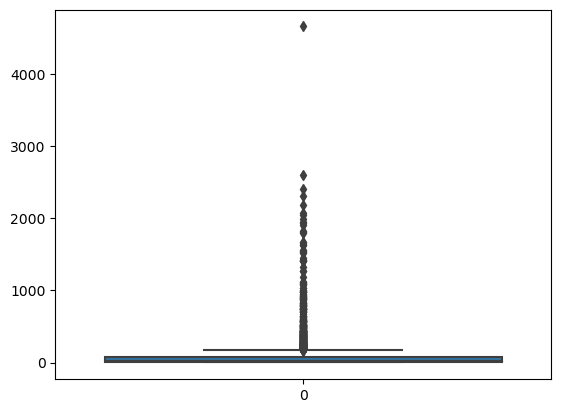

In [43]:
sns.boxplot(rating_p.product_id)

In [44]:
rating_p['index'][rating_p.product_id > 1000].count()

40

**Nhận xét:**
* Trong data Review có một số mã khách hàng có số lượng nhận xét rất cao, bất thường
* Dựa vào phân bố của boxplot, xem xét loại những dữ liệu có số lượng rating lớn hơn 1000

In [45]:
reviews_new = reviews.groupby('product_id').filter(lambda x : len(x)<1000)

In [46]:
reviews_new['product_id'].value_counts().sort_values(ascending=False)

554912      995
51593115    993
487524      984
51884751    977
7749111     976
           ... 
71102068      1
4727059       1
1513667       1
47516974      1
73123059      1
Name: product_id, Length: 4171, dtype: int64

<AxesSubplot: >

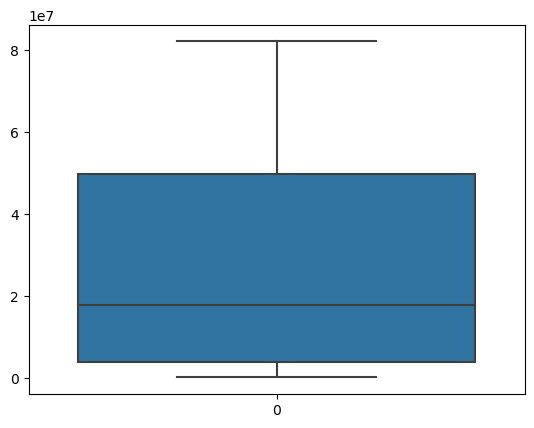

In [47]:
sns.boxplot(reviews_new.product_id)

In [48]:
reviews_new.shape

(293121, 5)

In [49]:
# # Save new file
# reviews_new.to_csv('Reviews.csv', index= False)